<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/outlier_treatment_placement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
from google.colab import files
uploaded = files.upload()

Saving placement 0.csv to placement 0.csv


In [11]:
df= pd.read_csv('placement 0.csv')

In [12]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# PLOTTING

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

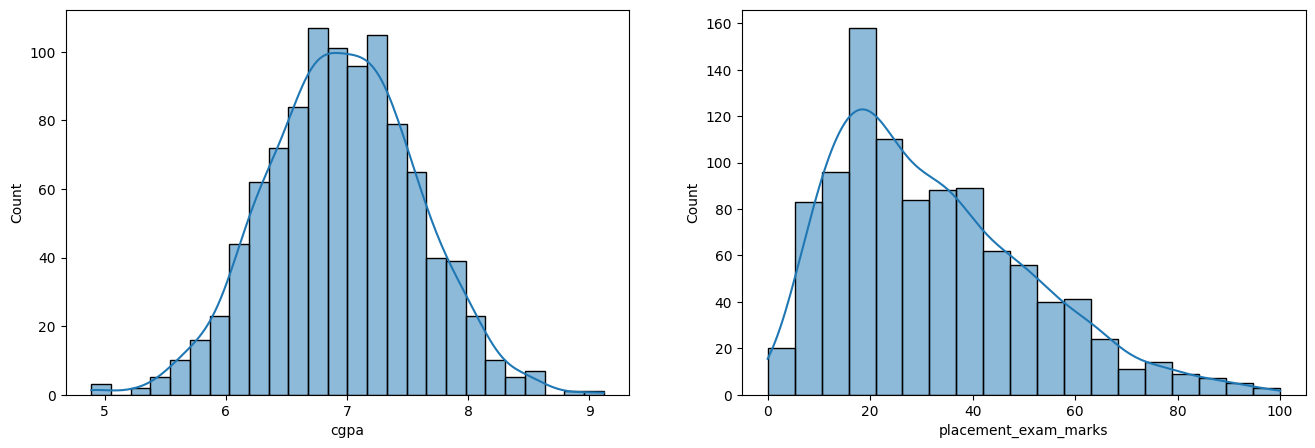

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

In [18]:
df.isnull().sum()

,0
cgpa,0
placement_exam_marks,0
placed,0


In [17]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# FINDING BOUNDRY VALUES

In [20]:
print("lowest -",df['cgpa'].quantile(0.01))
print("highest -",df['cgpa'].quantile(0.99))

lowest - 5.5596
highest - 8.4201


# DETECTION / CHECKING THE OUTLIERS

In [24]:
df[(df['cgpa']> 8.5 ) | (df['cgpa'] < 5.4 )]

,cgpa,placement_exam_marks,placed
37,8.51,9.0,1
150,8.53,22.0,0
278,5.23,17.0,1
440,8.56,22.0,0
485,4.92,44.0,1
815,5.27,43.0,0
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


#TRIMMING

In [25]:
new_df = df[(df['cgpa']<8.5 ) & (df['cgpa'] > 5.4 )]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


#APPROACH 2


#Z-SCORE

In [26]:
df['zscore'] = (df['cgpa']) - df['cgpa'].mean()/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,zscore
0,7.19,26.0,1,-4.112588
1,7.46,38.0,1,-3.842588
2,7.54,40.0,1,-3.762588
3,6.42,8.0,1,-4.882588
4,7.23,17.0,0,-4.072588
...,...,...,...,...
995,8.87,44.0,1,-2.432588
996,9.12,65.0,1,-2.182588
997,4.89,34.0,0,-6.412588
998,8.62,46.0,1,-2.682588


In [44]:
n_df= df[(df['zscore'] >3 ) | (df['zscore'] < -3 )]
n_df

,cgpa,placement_exam_marks,placed,zscore
0,7.19,26.0,1,-4.112588
1,7.46,38.0,1,-3.842588
2,7.54,40.0,1,-3.762588
3,6.42,8.0,1,-4.882588
4,7.23,17.0,0,-4.072588
...,...,...,...,...
992,6.26,12.0,0,-5.042588
993,6.73,21.0,1,-4.572588
994,6.48,63.0,0,-4.822588
997,4.89,34.0,0,-6.412588


In [45]:
n_df.shape

(986, 4)

# CAPPING

In [47]:
upper = df['cgpa'].mean() + 3*df['cgpa'].std()
lower = df['cgpa'].mean() - 3*df['cgpa'].std()

In [50]:
lower

5.113546374602832

In [51]:
upper

8.808933625397168

In [48]:
df['cgpa'] = np.where(
    df['cgpa']>upper,
    upper,
    np.where(
        df['cgpa']<lower,
        lower,
        df['cgpa']
    )
)

In [53]:
df.shape

(1000, 4)

In [54]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


# PLOTTING AGAIN

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

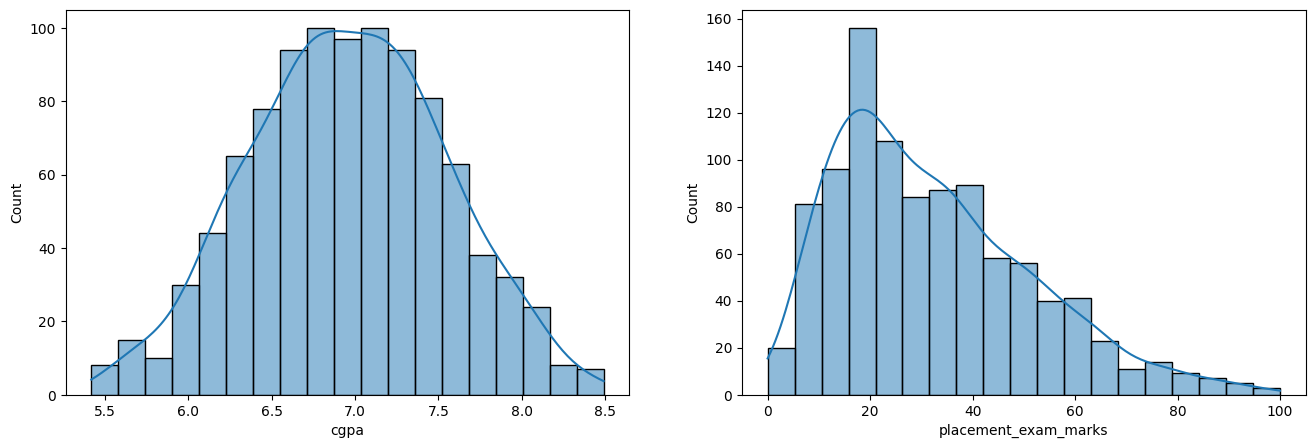

In [56]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(new_df['placement_exam_marks'],kde=True)

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

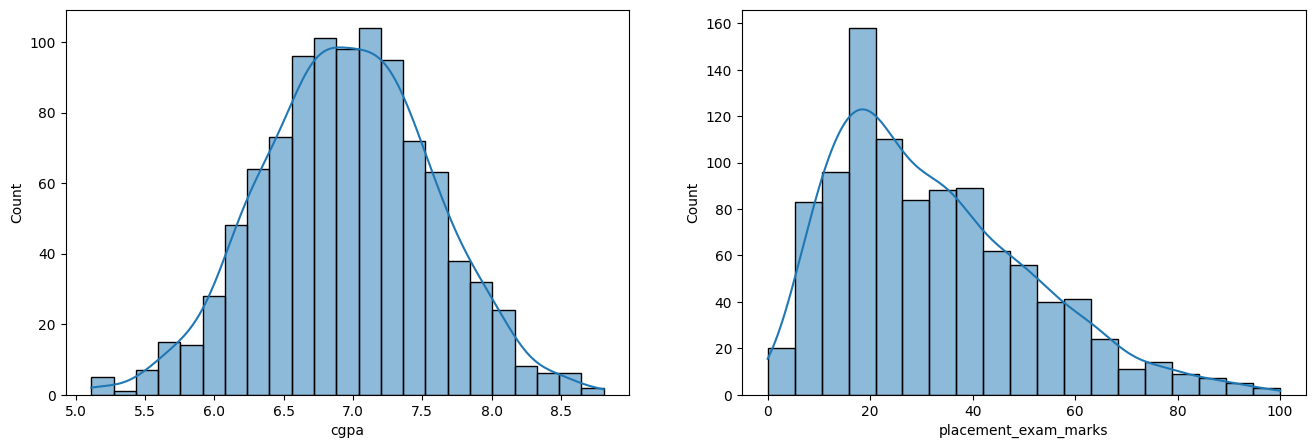

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)